# HW3 Sentiment Classification of IMDB 50,000 reviews dataset

#### We will download this very popular dataset from Kaggle (it also exists in many other places including within SciKit Learn itself). This dataset has 50,000 user reviews of movies plus a label stating it the sentiment of the review is positive or negative

#### The dataset as you will see if very simple in its raw form. It has two columns, one with with the review itself which can be between 1 word to a few thousand words.  The other feature is the sentiment itself (positive or negative)

#### The goal for this project would be to fit two classifiers: One using a DECISION Tree algorithm, the second using RANDOM FOREST.  The classifiers will be trained to take a review, and classify the review as negative or positive in sentiment.

#### This project will also do HYPERPARAMETER tunings of both Decision Tree and Random Forest in a CROSS-VALIDATION setup to derive an optimal result that will be tested with UNSEEN TEST DATA

# Essay

In order to properly address the issues and concerns expressed in the paper: "The GOOD, The BAD & The UGLY of Using Decision Trees - DeciZone", located at: https://decizone.com/blog/the-good-the-bad-the-ugly-of-using-decision-trees we will need to understand the following:

a) Nature of the raw data

b) Data transformations required to fit Decision Trees and a Random Forest


## a) Nature of the raw data
The raw data is noting more than written review done by thousands of movie viewers. As such they are not nothing more than a collection of words. We analized the raw data a found a few things which are important for this project.

1. The dataset is balanced The dataset has 50,000 reviews, with exactly half positive and half having a negative sentiment label.


2. The range of reviews measured by numbers of words by review was higlhy skewed to the right. Majority of reviews were 100-300 words but we did see a few outliers with almost 3,000 words.


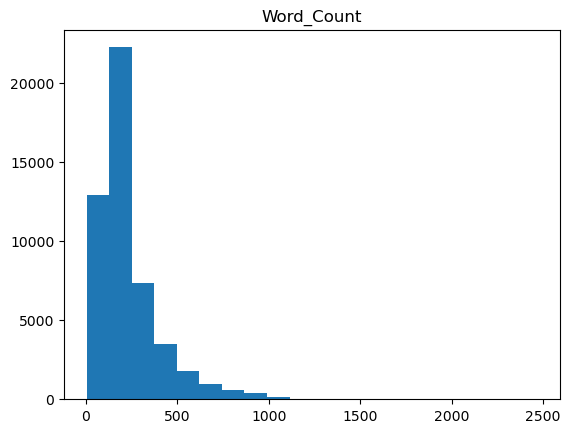

This is important because in order to train and fit a classifier, we would needs to vectorize our reviews. That is to create a bag of words, where each word becomes a feature and the numeric value of each word can be as simple as a word count, but in our case we will use TF-IDF (Term Frequency Inverse Document Frequency) to assign a value to each word-feature. Since most of reviews are less than 500 words, we will limit our word-vectors to the 500 most common words used


## b) Data Transformations Required

As mentioned before we will need to vectorize each review, by creating a feature for each individual word up to a specified limit. In our case it is 500 words. This is because we saw that most reviews by far are less than 500 words.  Our vectorization will transform our 50,000 x 2 dataset into a 50,000 x 501 dataset. 50,000 rows 1 foreach review. 500 Columns one for each word vector plus 1 more column for the label (sentiment). For the size (value) of each word-vector we will use the TF-IDF (Term Frequency Inverse Document Frequency) formula which assigns a value to each word based on their relative frequency.  The exact formula for TF-IDF is

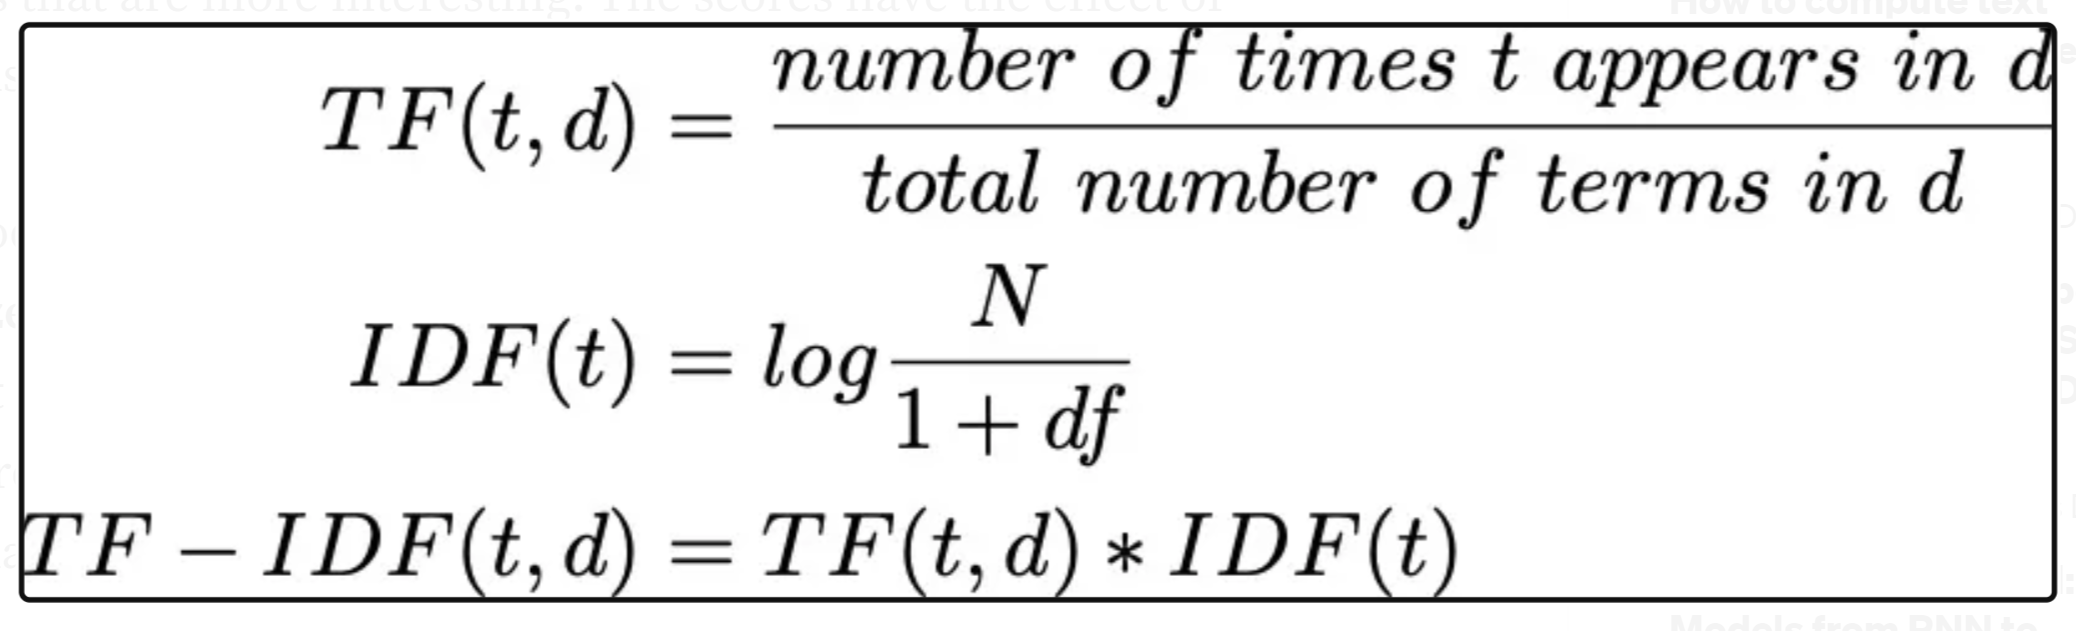

## How to address the BAD and the UGLY in this project

Now that we understand the nature of our raw data and the transformations required, we can address some specific BAD and UGLY things we would find in this project.


### Subjectivity
By using TF-IDF we have zero subjectivity.  Each word from each of the reviews used for training is evaluate under the same formula and assigned a vector magnitude.  This way we can see which words are important or signigicant to categorize a review as having a positive or negative sentiment.  The chars below do seem to make sense. Words like "bad", "worst", "great", "awful", etc, are the ones our models found to be most important to determine sentiment.

### Complexity
When you have a 50,000 x 500 dataset, the understanding of results can be very difficult. For this reason there are two plots which I believe would help to udnerstand the nature of the fitted model.  One is a TREE PLOT of the decision tree. The other is a plot of the most important words that have the greatest influence in classifying any review as positive or negative.


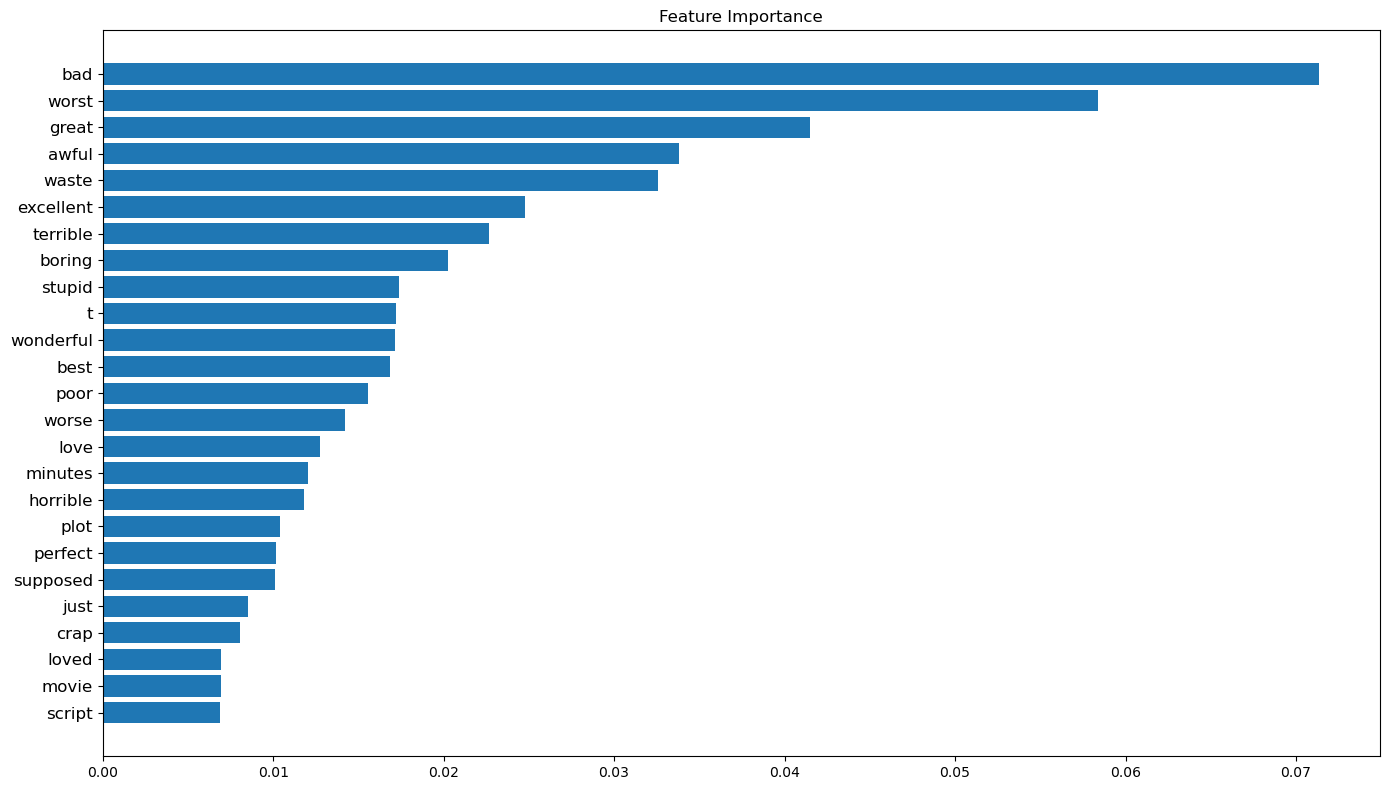

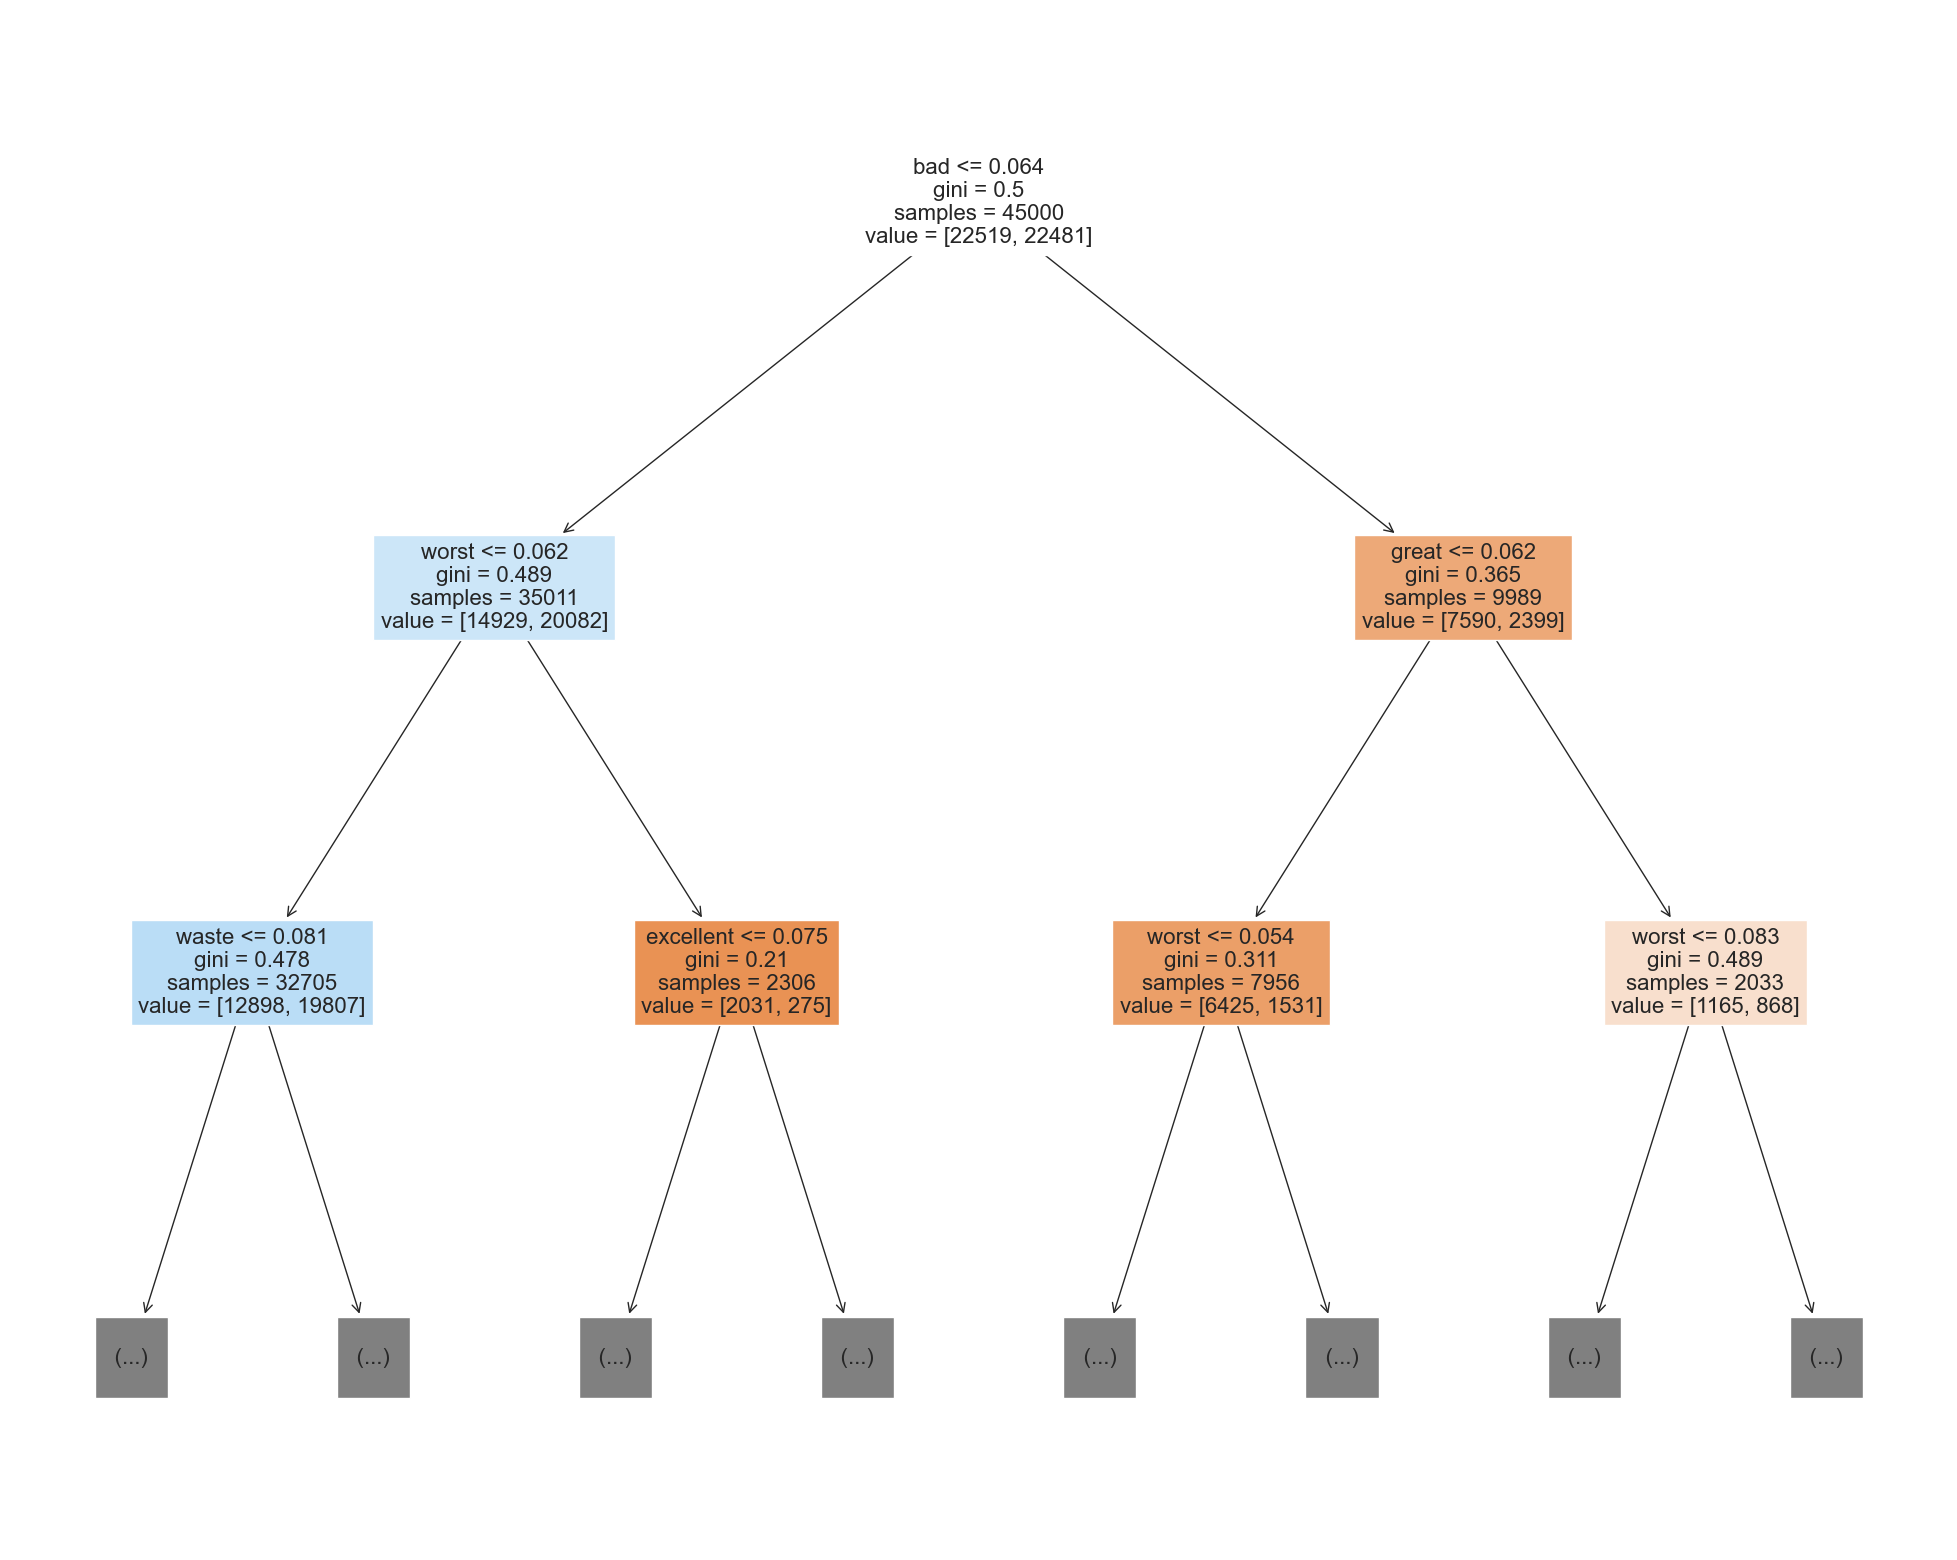

## Results from model fitting and conclusion

We ran a GRID SEARCH to do Hyper-Parameter tuning. Overall we fitted 36 models under different hyper-parameter combinations.  We used a Crossvalidation = 5 to divide our training in 5 equal parts, 4 for training and 1 for validation. Therefore overall I ran 180 model (36 x 5) to get the overall winner.

Randomr Forest with some specific hyperparameter of number of estimators (Trees in forest: 500), max-tree-depth (20) and min-samples-split (5) was the best fitted model with an overall accuract of 0.82

Below you can how each our our 36 models performed (measured as their level of accuracy)

Overall we can see that random forest due to their randome nature of averaging many decision trees tend to be better option (at a cost) to generalize a model. One big downside is hyper-parameter tuning which requires to run many models.

Our conclusions was that Random Forest had pretty decent results in classifying reviews. With more time we could explor expanding our number of features from 500 to a bigger number like 5,000 and see if this this materially improves results.  Another improvement would to be expand our Gridsearch witgh a wider set of values For example we could add 1,000 and 2,000 estimators and max tree depth to 50.  Nonetheless I feel 82% was a pretty good score to classify a review.


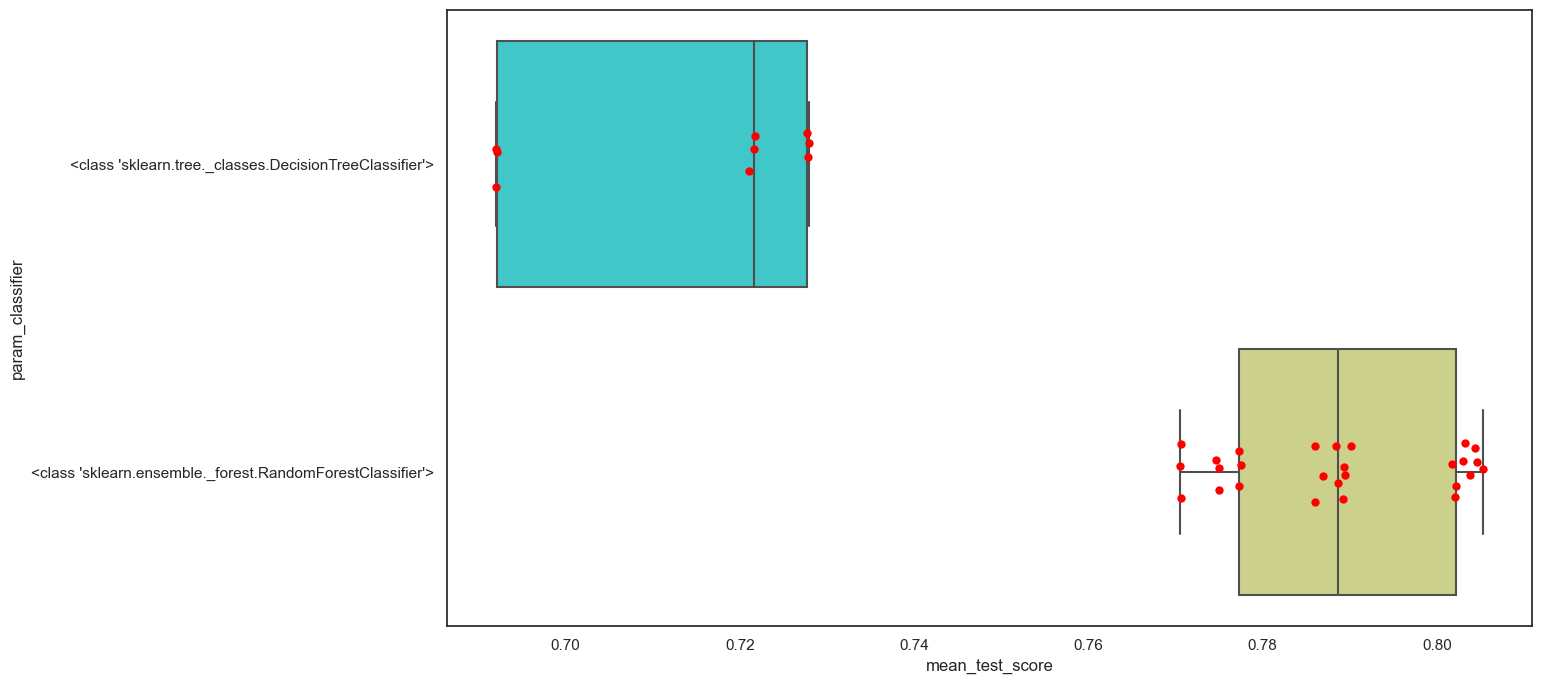

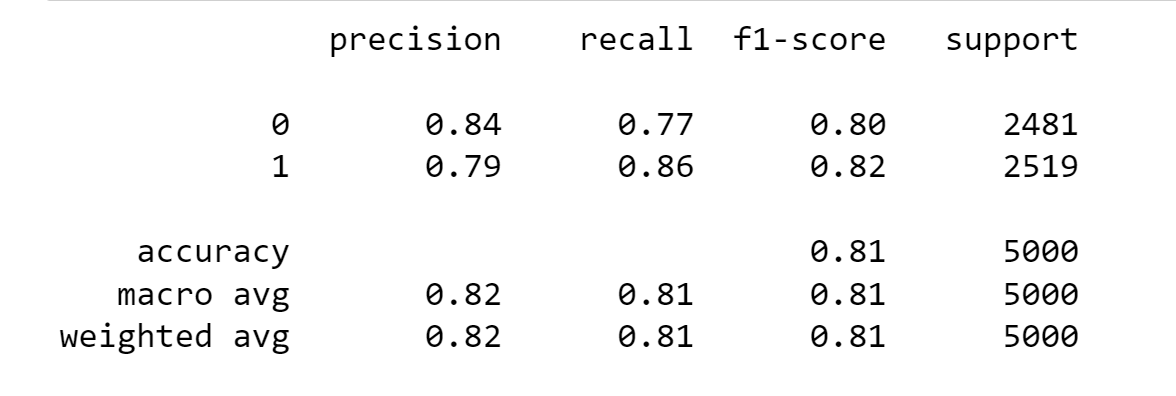

## ***********************************************************************************************************

# PYTHON CODE USED

## Load Libraries to be used

In [1]:
import warnings
import time
warnings.simplefilter(action='ignore', category=FutureWarning)

In [21]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import *
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

#from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report

import pickle
import numpy as np
from numpy import vectorize
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
%matplotlib inline  

#from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer



#  1 Load Data


In [3]:
# We will load 50,000 reviews

# Local download
#df = pd.read_csv("IMDB Dataset.csv")

# Download from personal cloud server for replicability
df = pd.read_csv("http://www.my-cunymsds.com/data622/IMDB Dataset.csv".replace(" ", "%20"))

# 2 Exploratory Data Analysis


In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [7]:
df.groupby("sentiment").count()

,review
sentiment,
negative,25000
positive,25000


array([[<AxesSubplot: title={'center': 'Word_Count'}>]], dtype=object)

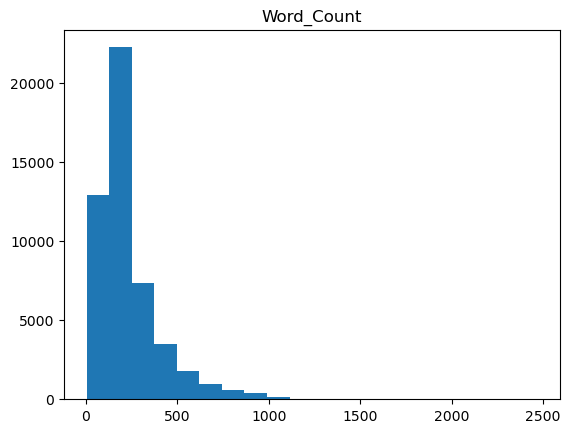

In [8]:
# Distribution of Reviews by word size
df["Word_Count"] = df["review"].apply(lambda n: len(n.split()))

df.hist(bins=20,grid=False)


# 3 Machine Learning

## 3.1 Prepare data

In [9]:
# We will separate the X(features) and y (labels)
df_X = df["review"]
df_y = df["sentiment"]

In [10]:
# We will change the labels positive/negative to 1/0
d = {'positive': 1, 'negative': 0}
df_y = df_y.map(d)
df_y.head()

0    1
1    1
2    1
3    0
4    1
Name: sentiment, dtype: int64

In [11]:
# We have to vectorize the reviews. That means to transform each review into a vector (Bag of words) which uses the TFIDF to provide
# a value for each word (up to 500 here) and their relative importance.

word_vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', sublinear_tf=True, strip_accents='unicode',
                                  stop_words='english', ngram_range=(1, 1), max_features=500)
word_vectorizer.fit(df_X)

# The results is a sparse matrix
df_X_tfidf = word_vectorizer.transform(df_X)

# IF you are interested you can also use it as a dense matrix but is not necessary
df_X_tfidf_dense = df_X_tfidf.todense()

In [12]:
# Here we see that the DENSE representation of the vectorized bag of words is a matrix 50,000 x 500

df_X_tfidf_dense.shape

(50000, 500)

In [13]:
# We will extract the Colum Names, which correspond to WORDS. This will be important later to identify
# Important words and also to print the Trees

col_names = word_vectorizer.get_feature_names_out()
col_names

array(['1', '10', '2', '3', '4', '5', '7', 'able', 'absolutely', 'act',
       'acting', 'action', 'actor', 'actors', 'actress', 'actually',
       'age', 'ago', 'amazing', 'american', 'annoying', 'apparently',
       'aren', 'art', 'attempt', 'attention', 'audience', 'away', 'awful',
       'b', 'bad', 'based', 'basically', 'beautiful', 'beginning',
       'believe', 'best', 'better', 'big', 'bit', 'black', 'blood',
       'body', 'book', 'boring', 'boy', 'br', 'brilliant', 'british',
       'brother', 'budget', 'called', 'came', 'camera', 'car', 'care',
       'career', 'case', 'cast', 'certainly', 'chance', 'change',
       'character', 'characters', 'cheap', 'child', 'children', 'cinema',
       'cinematography', 'city', 'class', 'classic', 'clearly', 'close',
       'come', 'comedy', 'comes', 'coming', 'complete', 'completely',
       'cool', 'couldn', 'country', 'couple', 'course', 'crap', 'cut',
       'd', 'dark', 'daughter', 'david', 'day', 'days', 'dead', 'death',
       'dec

In [14]:
# We will split the data between Training and Test
rs = 42
X_train, X_test, y_train, y_test = train_test_split(
    df_X_tfidf, df_y, test_size=0.1, random_state=rs)


## 3.2 Define the Classifiers

In [15]:
# Initialze the classifiers. In this case 1-Decision Tree 2-Random Forest
reg1 = DecisionTreeClassifier(random_state=rs)
reg2 = RandomForestClassifier(random_state=rs)


In [16]:
#Initialize the hyperparameters for each dictionary

param1 = {}
param1['classifier__max_depth'] = [5,10,15]
param1['classifier__min_samples_split'] = [5,10,15]
param1['classifier'] = [reg1]

param2 = {}
param2['classifier__n_estimators'] = [100,200,500]
param2['classifier__min_samples_split'] = [5,10,15]
param2['classifier__max_depth'] = [5,10,20]
param2['classifier'] = [reg2]


params = [param1,param2]


In [17]:
# Here de define a simple pipeline, firt we impute any missing values, then we fit the classifier
pipeline2 = Pipeline([('imputer',SimpleImputer()),
                      ('classifier', reg1)],verbose=True)



## 3.3 Fit the model / (Gridsearch for HyperParameter Tuning and Cross-Validation)

In [22]:
%%time

#################### Fit all Models doing Cross-Validation and Hyperparameter Tuning
start_time = time.time()

#### Gridsearch CV allows us to to Cross-Validation
gs = GridSearchCV(pipeline2, params, cv=5, n_jobs= -1, scoring='accuracy', 
                  verbose = 4, return_train_score=True).fit(X_train, np.ravel(y_train))

(time.time() - start_time) /60

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[Pipeline] ........... (step 1 of 2) Processing imputer, total=   0.1s
[Pipeline] ........ (step 2 of 2) Processing classifier, total= 2.9min
CPU times: total: 2min 39s
Wall time: 16min 30s


16.50606851577759

#### We had two algorithms to train (Decision Tree and RandomForest). Because of hyper-parameter tuning we ended up this 36 candidate models. When add that we did a cross-validation=5, we fitted a total of 180 models.

#### That took a total of 16 minutes and 30 seconds on my laptop

## 3.4 Review Fit Results of Best Performing Model

In [23]:
# Best performing model and its corresponding hyperparameters
gs.best_params_


{'classifier': RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=500,
                        random_state=42),
 'classifier__max_depth': 20,
 'classifier__min_samples_split': 5,
 'classifier__n_estimators': 500}

In [24]:
# What was the performance (accuracy) score of the best model
gs.best_score_

0.8052666666666667

In [25]:
# Now lets see how our best model perform with unseen Test Data
print("Test Accuracy Score:",accuracy_score(gs.predict(X_test), y_test))
print("Test Precision Score:",precision_score(gs.predict(X_test), y_test))


Test Accuracy Score: 0.8134
Test Precision Score: 0.8551012306470822


In [26]:
my_predictions = pd.DataFrame(gs.predict(X_test))

In [27]:
# Lets print a confusion Matrix with Test Data
print(confusion_matrix(my_predictions, y_test))

[[1913  365]
 [ 568 2154]]


In [28]:
print(classification_report(y_test, my_predictions))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80      2481
           1       0.79      0.86      0.82      2519

    accuracy                           0.81      5000
   macro avg       0.82      0.81      0.81      5000
weighted avg       0.82      0.81      0.81      5000



In [29]:
##########################
# SAVE-LOAD using pickle #
##########################
import pickle

# save
with open('model.pkl','wb') as f:
    pickle.dump(gs,f)



In [30]:
# load
with open('model.pkl', 'rb') as f:
    gs = pickle.load(f)



## 3.5 Feature (word) Importance

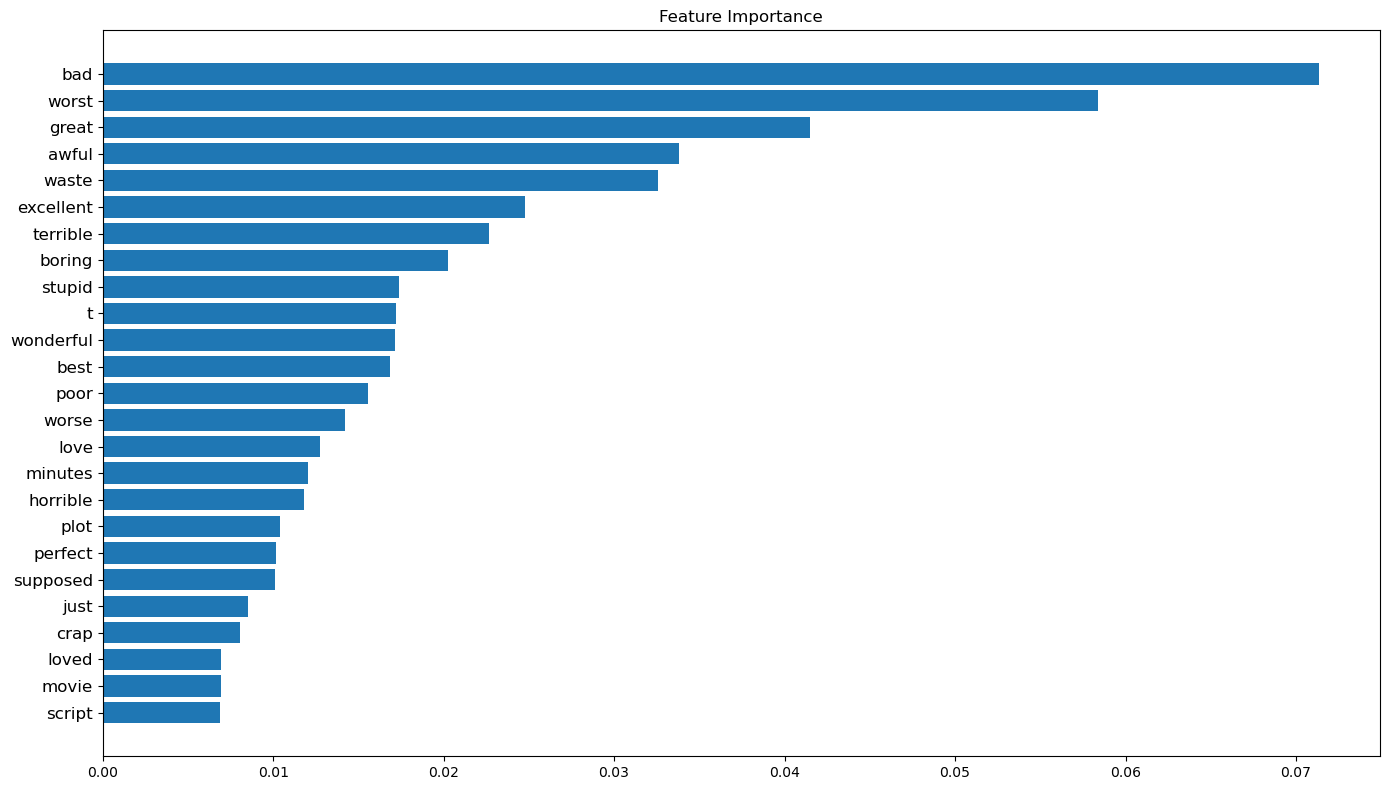

In [31]:
# This part of the code is to determine which features (WORDS) were the most important for the select Best model
feature_importance = gs.best_estimator_.steps[1][1].feature_importances_
sorted_idx = np.argsort(feature_importance)

words2plot = 25

pos = np.arange(words2plot) + 0.5
fig = plt.figure(figsize=(14, 8))

plt.barh(pos, feature_importance[sorted_idx][-words2plot:], align="center")
plt.yticks(pos, np.array(col_names)[sorted_idx][-words2plot:], fontsize=12)
plt.title("Feature Importance")

fig.tight_layout()
plt.show()

## 3.6 Plot Trees

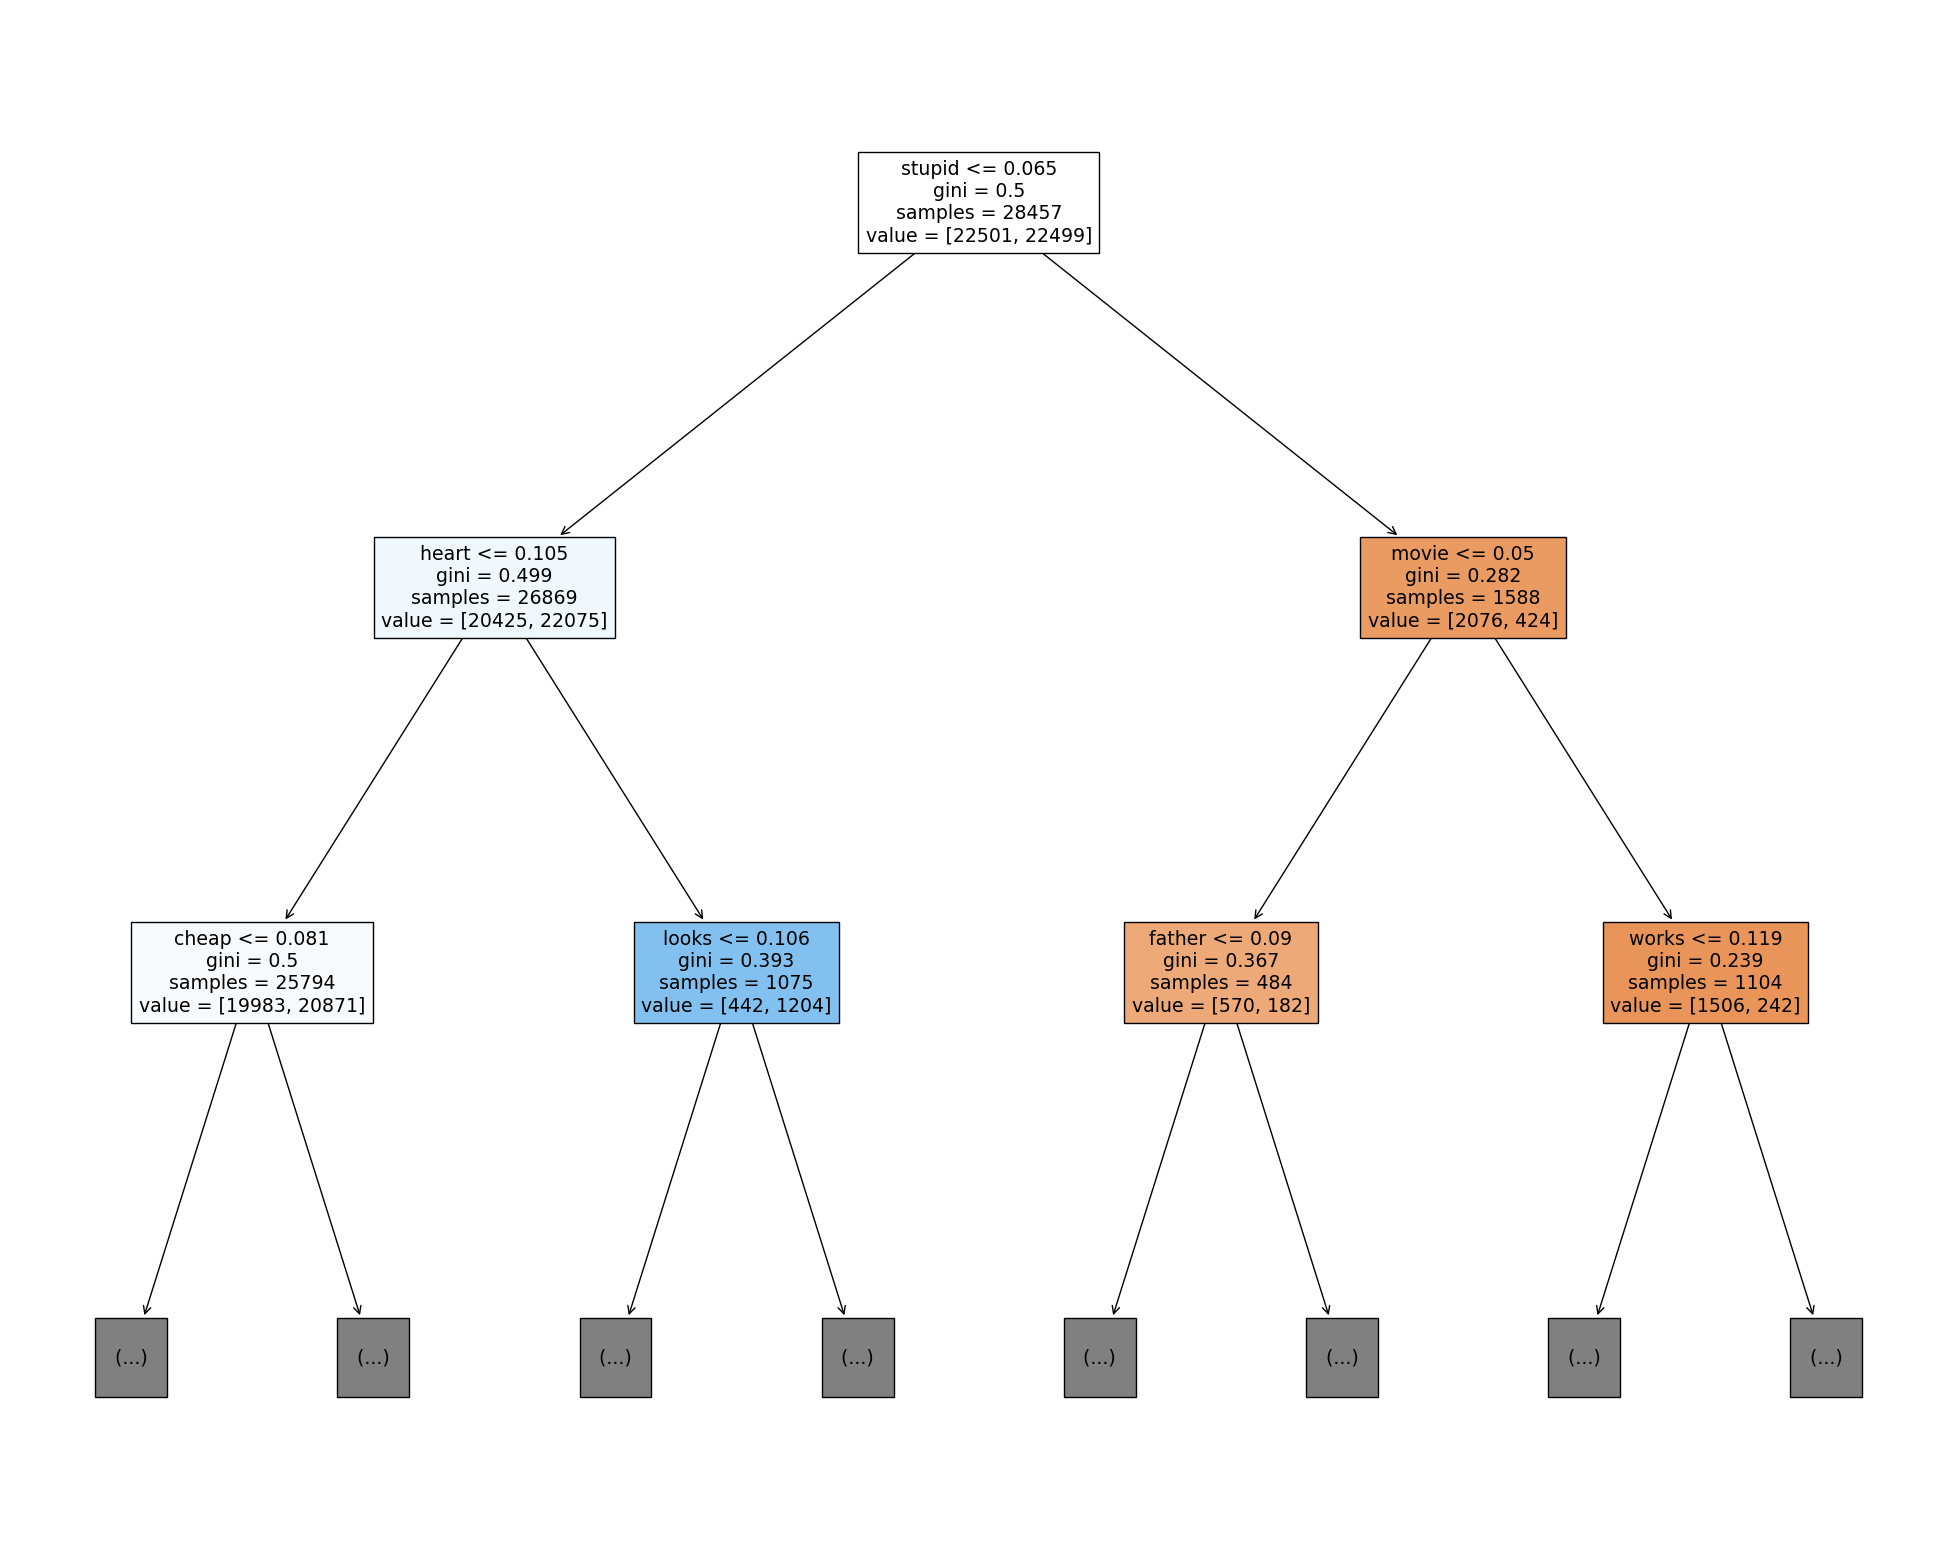

In [32]:
# Lets see the corresponding tree graphically. Jsut the first 3 levels
best_decisiontree = gs.best_estimator_[1][0]

# Since the BEST model was a RANDOM FOREST, this would extract the FIRST of the trees in the forest
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_decisiontree, 
                   feature_names=col_names,
                   filled=True, max_depth=2)



In [33]:
# Here we cand look at all models used. For example search the BEST Decision Tree, and re-fit the model
# In this case #6 with Max_dept = 15, min_samples_split = 5 gives BEST Results
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__max_depth,param_classifier__min_samples_split,param_classifier__n_estimators,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.301649,0.016308,0.029123,0.007658,DecisionTreeClassifier(random_state=42),5,5,NaN,{'classifier': DecisionTreeClassifier(random_s...,0.690556,...,0.692067,0.005600,34,0.697278,0.697528,0.695889,0.699139,0.694861,0.696939,0.001464
1,2.379442,0.139015,0.048271,0.017085,DecisionTreeClassifier(random_state=42),5,10,NaN,{'classifier': DecisionTreeClassifier(random_s...,0.690556,...,0.692044,0.005578,35,0.697222,0.697444,0.695778,0.699139,0.694861,0.696889,0.001472
2,2.510491,0.208338,0.038098,0.001933,DecisionTreeClassifier(random_state=42),5,15,NaN,{'classifier': DecisionTreeClassifier(random_s...,0.690556,...,0.692044,0.005578,35,0.697222,0.697444,0.695778,0.699139,0.694861,0.696889,0.001472
3,4.690663,0.551442,0.026130,0.004942,DecisionTreeClassifier(random_state=42),10,5,NaN,{'classifier': DecisionTreeClassifier(random_s...,0.725444,...,0.721756,0.005521,31,0.756278,0.752167,0.751444,0.753278,0.749056,0.752444,0.002364
4,4.456090,0.228137,0.028524,0.007371,DecisionTreeClassifier(random_state=42),10,10,NaN,{'classifier': DecisionTreeClassifier(random_s...,0.725778,...,0.721622,0.005306,32,0.755556,0.751139,0.750583,0.752361,0.748361,0.751600,0.002365
5,4.524308,0.298180,0.027726,0.004566,DecisionTreeClassifier(random_state=42),10,15,NaN,{'classifier': DecisionTreeClassifier(random_s...,0.724444,...,0.721022,0.005408,33,0.754500,0.750194,0.749722,0.751278,0.747333,0.750606,0.002336
6,8.154605,0.126642,0.023338,0.003373,DecisionTreeClassifier(random_state=42),15,5,NaN,{'classifier': DecisionTreeClassifier(random_s...,0.728667,...,0.727956,0.007807,28,0.796444,0.800306,0.799528,0.797833,0.797833,0.798389,0.001369
7,8.012585,0.199797,0.026330,0.006482,DecisionTreeClassifier(random_state=42),15,10,NaN,{'classifier': DecisionTreeClassifier(random_s...,0.729000,...,0.727867,0.007176,29,0.793694,0.797139,0.796028,0.794500,0.795528,0.795378,0.001196
8,8.760187,0.722732,0.026729,0.008258,DecisionTreeClassifier(random_state=42),15,15,NaN,{'classifier': DecisionTreeClassifier(random_s...,0.728667,...,0.727667,0.007208,30,0.789806,0.794361,0.793056,0.790556,0.791944,0.791944,0.001648
9,8.124487,0.199086,0.257113,0.018938,"RandomForestClassifier(max_depth=20, min_sampl...",5,5,100,{'classifier': RandomForestClassifier(max_dept...,0.779778,...,0.777244,0.005801,21,0.785028,0.785833,0.785222,0.786472,0.785750,0.785661,0.000508


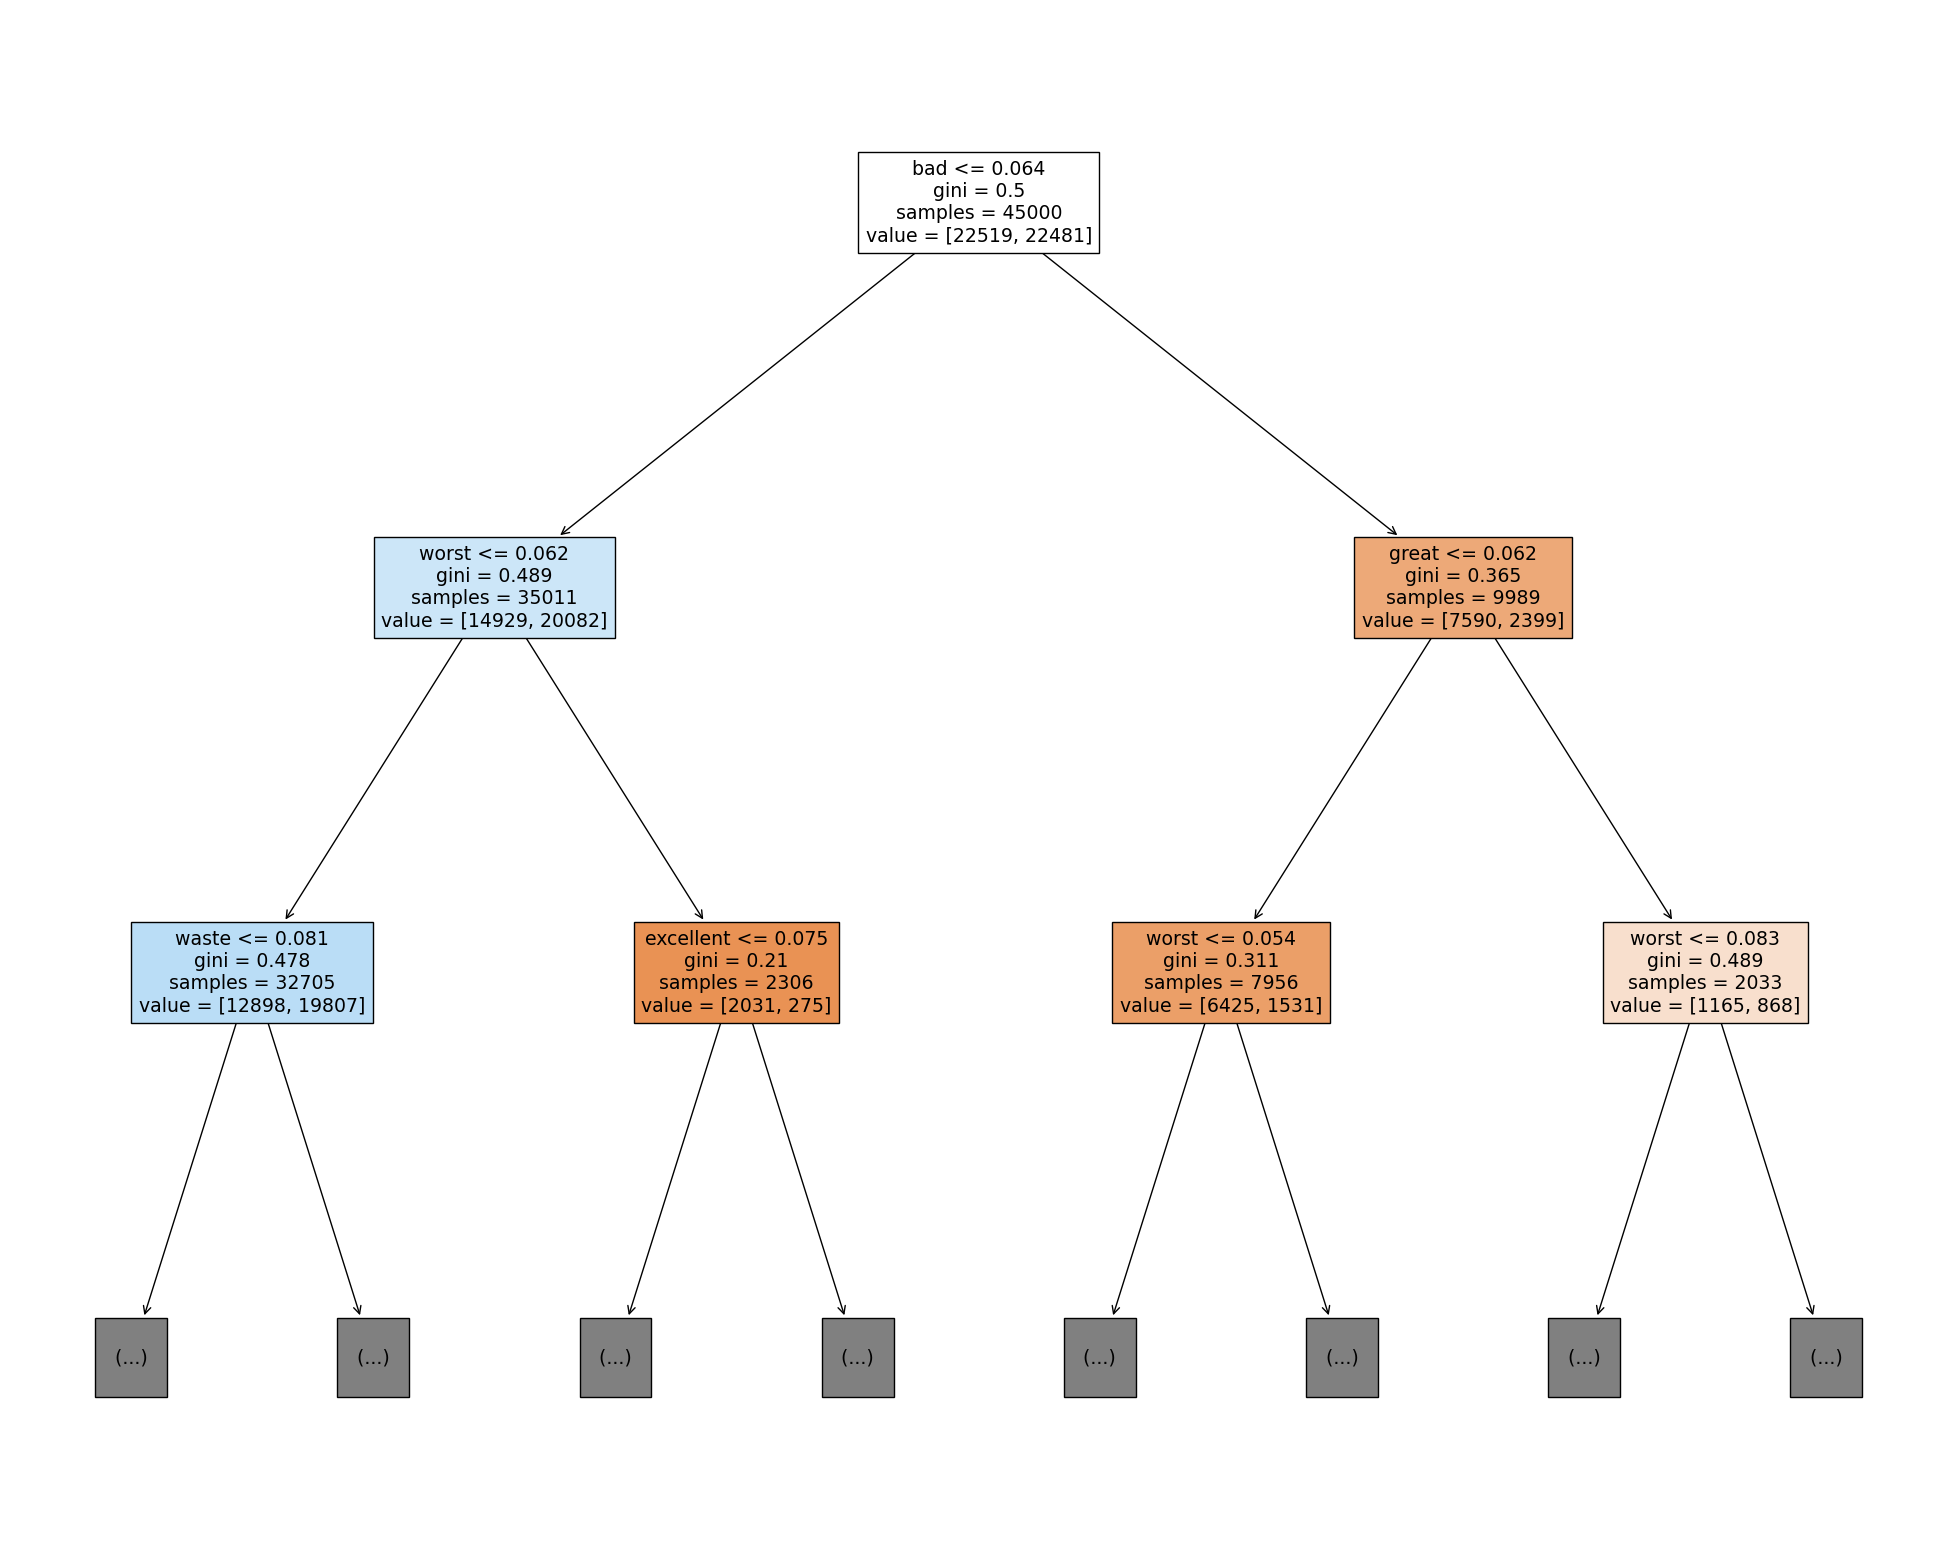

In [34]:
# Here we refit a single decision TREE, based on the parameters that gave us the best results in the GRIDSEARCHCV
clf = DecisionTreeClassifier(random_state=0, max_depth=15,
                            min_samples_split=5)

clf = clf.fit(X_train,y_train)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=col_names,
                   filled=True, max_depth=2)


In [35]:
#txt_representation = tree.export_text(best_decisiontree, max_depth=2,feature_names = list(col_names))
#print(text_representation)

# 4 Deep Review of Fit Results


## 4.1 Peformance Results of Fitted Models

<AxesSubplot: >

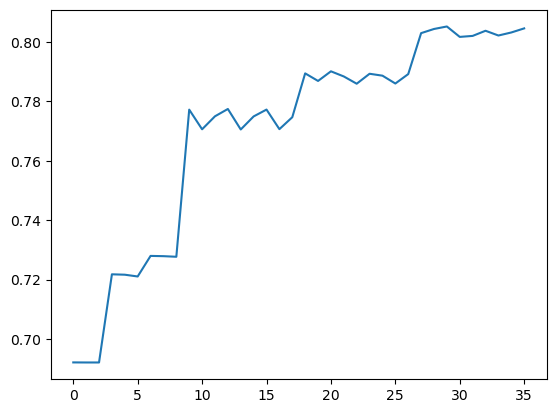

In [36]:
#Let's plot the resulting accuract of all our tested models (36)
pd.DataFrame(gs.cv_results_)['mean_test_score'].plot()

In [37]:
df = pd.DataFrame(gs.cv_results_)
df.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__max_depth,param_classifier__min_samples_split,param_classifier__n_estimators,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.301649,0.016308,0.029123,0.007658,DecisionTreeClassifier(random_state=42),5,5,NaN,{'classifier': DecisionTreeClassifier(random_s...,0.690556,...,0.692067,0.005600,34,0.697278,0.697528,0.695889,0.699139,0.694861,0.696939,0.001464
1,2.379442,0.139015,0.048271,0.017085,DecisionTreeClassifier(random_state=42),5,10,NaN,{'classifier': DecisionTreeClassifier(random_s...,0.690556,...,0.692044,0.005578,35,0.697222,0.697444,0.695778,0.699139,0.694861,0.696889,0.001472
2,2.510491,0.208338,0.038098,0.001933,DecisionTreeClassifier(random_state=42),5,15,NaN,{'classifier': DecisionTreeClassifier(random_s...,0.690556,...,0.692044,0.005578,35,0.697222,0.697444,0.695778,0.699139,0.694861,0.696889,0.001472
3,4.690663,0.551442,0.026130,0.004942,DecisionTreeClassifier(random_state=42),10,5,NaN,{'classifier': DecisionTreeClassifier(random_s...,0.725444,...,0.721756,0.005521,31,0.756278,0.752167,0.751444,0.753278,0.749056,0.752444,0.002364
4,4.456090,0.228137,0.028524,0.007371,DecisionTreeClassifier(random_state=42),10,10,NaN,{'classifier': DecisionTreeClassifier(random_s...,0.725778,...,0.721622,0.005306,32,0.755556,0.751139,0.750583,0.752361,0.748361,0.751600,0.002365
5,4.524308,0.298180,0.027726,0.004566,DecisionTreeClassifier(random_state=42),10,15,NaN,{'classifier': DecisionTreeClassifier(random_s...,0.724444,...,0.721022,0.005408,33,0.754500,0.750194,0.749722,0.751278,0.747333,0.750606,0.002336
6,8.154605,0.126642,0.023338,0.003373,DecisionTreeClassifier(random_state=42),15,5,NaN,{'classifier': DecisionTreeClassifier(random_s...,0.728667,...,0.727956,0.007807,28,0.796444,0.800306,0.799528,0.797833,0.797833,0.798389,0.001369
7,8.012585,0.199797,0.026330,0.006482,DecisionTreeClassifier(random_state=42),15,10,NaN,{'classifier': DecisionTreeClassifier(random_s...,0.729000,...,0.727867,0.007176,29,0.793694,0.797139,0.796028,0.794500,0.795528,0.795378,0.001196
8,8.760187,0.722732,0.026729,0.008258,DecisionTreeClassifier(random_state=42),15,15,NaN,{'classifier': DecisionTreeClassifier(random_s...,0.728667,...,0.727667,0.007208,30,0.789806,0.794361,0.793056,0.790556,0.791944,0.791944,0.001648
9,8.124487,0.199086,0.257113,0.018938,"RandomForestClassifier(max_depth=20, min_sampl...",5,5,100,{'classifier': RandomForestClassifier(max_dept...,0.779778,...,0.777244,0.005801,21,0.785028,0.785833,0.785222,0.786472,0.785750,0.785661,0.000508


## 4.2 Prepare Data for detailed review

In [38]:
def return_model(model):
    return str(getattr(model,'__class__'))

In [39]:
df['param_classifier'] = df['param_classifier'].apply(vectorize(return_model))

In [40]:
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__max_depth,param_classifier__min_samples_split,param_classifier__n_estimators,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.301649,0.016308,0.029123,0.007658,<class 'sklearn.tree._classes.DecisionTreeClas...,5,5,NaN,{'classifier': DecisionTreeClassifier(random_s...,0.690556,...,0.692067,0.005600,34,0.697278,0.697528,0.695889,0.699139,0.694861,0.696939,0.001464
1,2.379442,0.139015,0.048271,0.017085,<class 'sklearn.tree._classes.DecisionTreeClas...,5,10,NaN,{'classifier': DecisionTreeClassifier(random_s...,0.690556,...,0.692044,0.005578,35,0.697222,0.697444,0.695778,0.699139,0.694861,0.696889,0.001472
2,2.510491,0.208338,0.038098,0.001933,<class 'sklearn.tree._classes.DecisionTreeClas...,5,15,NaN,{'classifier': DecisionTreeClassifier(random_s...,0.690556,...,0.692044,0.005578,35,0.697222,0.697444,0.695778,0.699139,0.694861,0.696889,0.001472
3,4.690663,0.551442,0.026130,0.004942,<class 'sklearn.tree._classes.DecisionTreeClas...,10,5,NaN,{'classifier': DecisionTreeClassifier(random_s...,0.725444,...,0.721756,0.005521,31,0.756278,0.752167,0.751444,0.753278,0.749056,0.752444,0.002364
4,4.456090,0.228137,0.028524,0.007371,<class 'sklearn.tree._classes.DecisionTreeClas...,10,10,NaN,{'classifier': DecisionTreeClassifier(random_s...,0.725778,...,0.721622,0.005306,32,0.755556,0.751139,0.750583,0.752361,0.748361,0.751600,0.002365


In [41]:
# Let's remove all rows with very low R2 <0 if any
cutoff = -100
df2 = df[df['mean_test_score']>=cutoff]

In [42]:
sorted_index = df2.groupby('param_classifier')['mean_test_score'].median().sort_values().index.tolist()
sorted_index

["<class 'sklearn.tree._classes.DecisionTreeClassifier'>",
 "<class 'sklearn.ensemble._forest.RandomForestClassifier'>"]

In [43]:
df2b = df2
df2b['param_classifier'] = pd.Categorical(df2['param_classifier'], sorted_index)

In [44]:
#Classifiers listed in order of their MAX best score
df2b.groupby('param_classifier')['mean_test_score'].max().sort_values(ascending=False)

param_classifier
<class 'sklearn.ensemble._forest.RandomForestClassifier'>    0.805267
<class 'sklearn.tree._classes.DecisionTreeClassifier'>       0.727956
Name: mean_test_score, dtype: float64

In [45]:
#Top FITS ordered by mean_test_score

all_fits_sorted = df2b[['param_classifier','mean_test_score']].sort_values(by='mean_test_score',ascending=False)
all_fits_sorted.reset_index(drop=True, inplace=True)

all_fits_sorted.head(10)

,param_classifier,mean_test_score
0,<class 'sklearn.ensemble._forest.RandomForestC...,0.805267
1,<class 'sklearn.ensemble._forest.RandomForestC...,0.804622
2,<class 'sklearn.ensemble._forest.RandomForestC...,0.804422
3,<class 'sklearn.ensemble._forest.RandomForestC...,0.803822
4,<class 'sklearn.ensemble._forest.RandomForestC...,0.803244
5,<class 'sklearn.ensemble._forest.RandomForestC...,0.803022
6,<class 'sklearn.ensemble._forest.RandomForestC...,0.802222
7,<class 'sklearn.ensemble._forest.RandomForestC...,0.802089
8,<class 'sklearn.ensemble._forest.RandomForestC...,0.801756
9,<class 'sklearn.ensemble._forest.RandomForestC...,0.790156


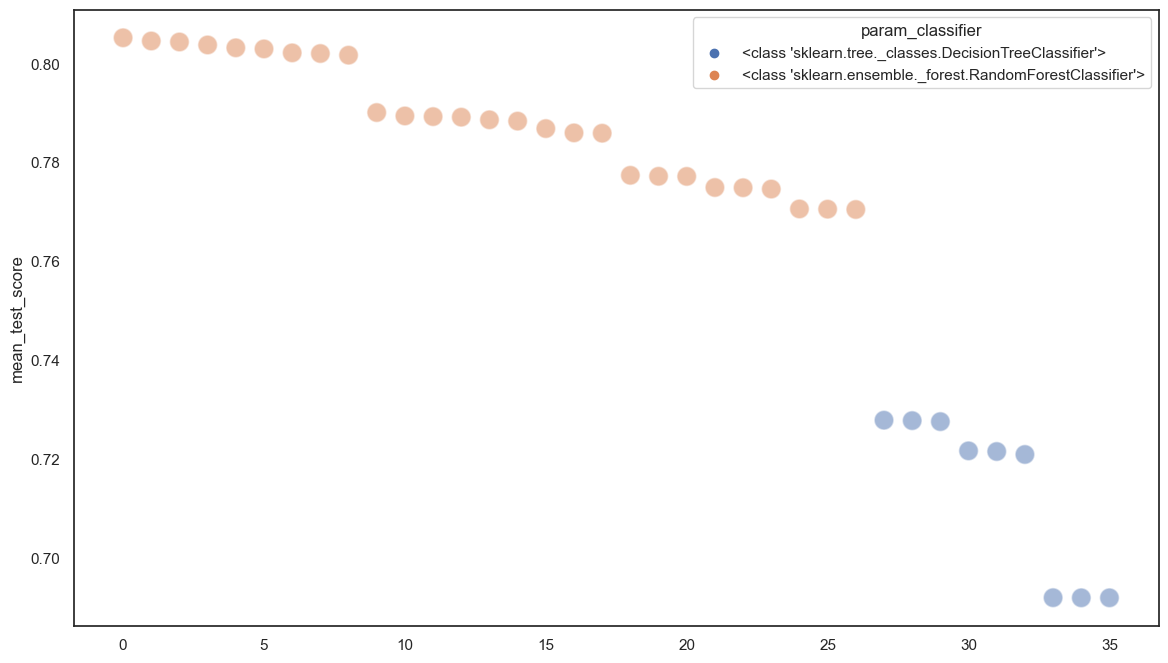

In [46]:
#Lets plot again all our tested models with some information which algorithm each one was
sns.set(rc={'figure.figsize':(14,8)})
sns.set_style("white")
fitplot = sns.scatterplot(x=all_fits_sorted.index, y='mean_test_score',hue="param_classifier", alpha=0.5, s=200,data=all_fits_sorted)
plt.show()

In [47]:
#df2b.boxplot(by ='param_classifier', column =['mean_test_score'], grid = False,figsize=(12, 8), vert=False)

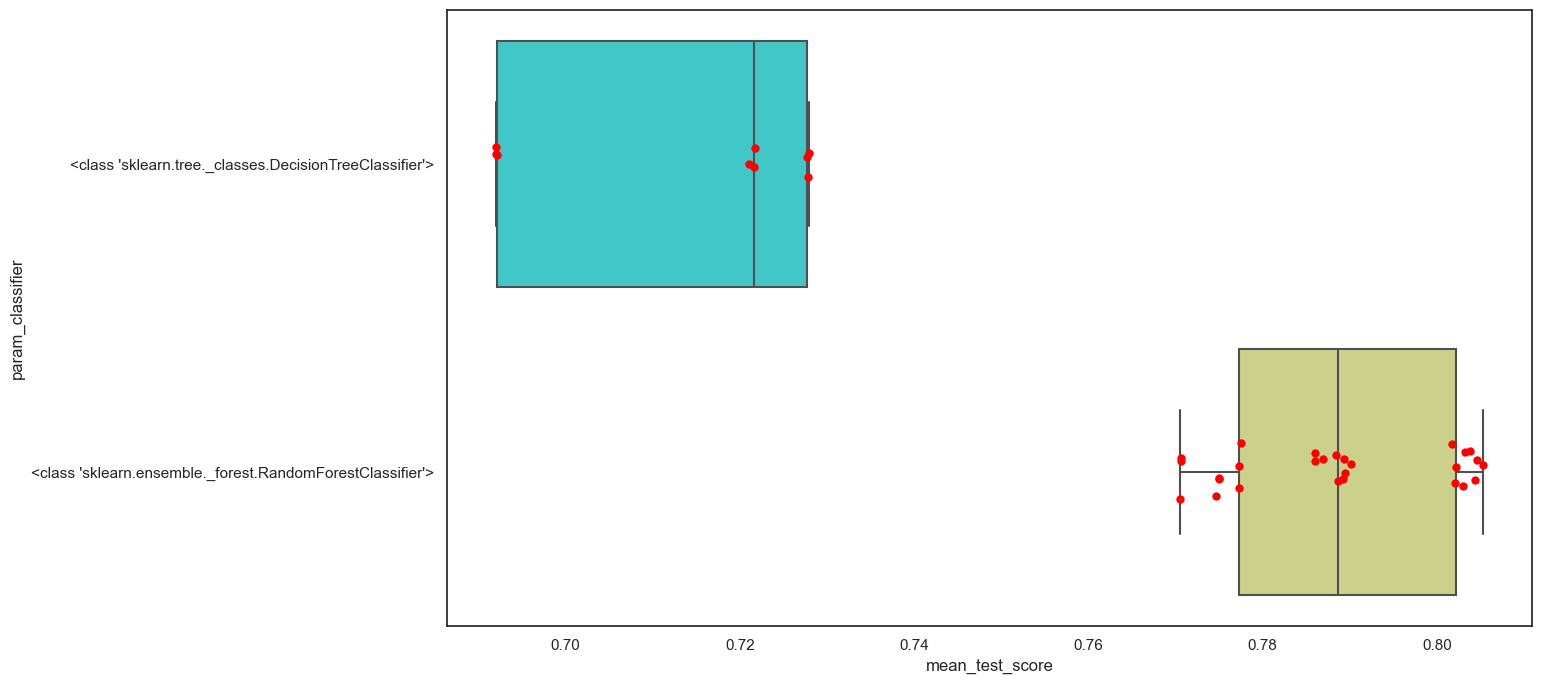

In [48]:
%matplotlib inline  

# Plot both Classifiers and their performance for each fitted model
sns.set(rc={'figure.figsize':(14,8)})
sns.set_style("white")
boxplot = sns.boxplot(y='param_classifier',x='mean_test_score',  data=df2, orient='h', palette="rainbow")
boxplot = sns.stripplot(y='param_classifier',x='mean_test_score',  data=df2, orient='h', color="red", size=6)
plt.show()

## 4.3 Analysis of Best Classifier in Fitting (RANDOM FOREST)


In [49]:
df3 = df[df['param_classifier'] == "<class 'sklearn.ensemble._forest.RandomForestClassifier'>"]


In [50]:
df3.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__max_depth,param_classifier__min_samples_split,param_classifier__n_estimators,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
9,8.124487,0.199086,0.257113,0.018938,<class 'sklearn.ensemble._forest.RandomForestC...,5,5,100,{'classifier': RandomForestClassifier(max_dept...,0.779778,...,0.777244,0.005801,21,0.785028,0.785833,0.785222,0.786472,0.785750,0.785661,0.000508
10,16.174571,0.985159,0.441222,0.035930,<class 'sklearn.ensemble._forest.RandomForestC...,5,5,200,{'classifier': RandomForestClassifier(max_dept...,0.774444,...,0.770622,0.006146,26,0.777528,0.778917,0.778250,0.779528,0.780111,0.778867,0.000912
11,39.894576,0.929847,1.066749,0.092544,<class 'sklearn.ensemble._forest.RandomForestC...,5,5,500,{'classifier': RandomForestClassifier(max_dept...,0.779667,...,0.775000,0.006506,22,0.782889,0.783833,0.783389,0.784472,0.785000,0.783917,0.000752
12,9.132193,0.849040,0.242552,0.026117,<class 'sklearn.ensemble._forest.RandomForestC...,5,10,100,{'classifier': RandomForestClassifier(max_dept...,0.781000,...,0.777467,0.006344,19,0.784472,0.785222,0.784306,0.785167,0.785361,0.784906,0.000430
13,16.888862,1.160637,0.495077,0.038738,<class 'sklearn.ensemble._forest.RandomForestC...,5,10,200,{'classifier': RandomForestClassifier(max_dept...,0.774111,...,0.770556,0.006185,27,0.776694,0.779333,0.777111,0.779722,0.780028,0.778578,0.001391


In [51]:
# The next few lines are just to prepare data so we can plot for the selected classifier
param_list = []
param_list = df3[[col for col in df3.columns if col.startswith('param_')]].sum(axis=0,skipna=False)
param_list

param_classifier                       <class 'sklearn.ensemble._forest.RandomForestC...
param_classifier__max_depth                                                          315
param_classifier__min_samples_split                                                  270
param_classifier__n_estimators                                                      7200
dtype: object

In [52]:
# The next few lines are just to prepare data so we can plot for the selected classifier
param_list = param_list[param_list.notna()]

In [53]:
# The next few lines are just to prepare data so we can plot for the selected classifier
param_list

param_classifier                       <class 'sklearn.ensemble._forest.RandomForestC...
param_classifier__max_depth                                                          315
param_classifier__min_samples_split                                                  270
param_classifier__n_estimators                                                      7200
dtype: object

In [54]:
# The next few lines are just to prepare data so we can plot for the selected classifier
param_list = param_list.index.tolist()
param_list

['param_classifier',
 'param_classifier__max_depth',
 'param_classifier__min_samples_split',
 'param_classifier__n_estimators']

## 4.4 Plot HyperParameter Impact of RANDOM FOREST Classifier

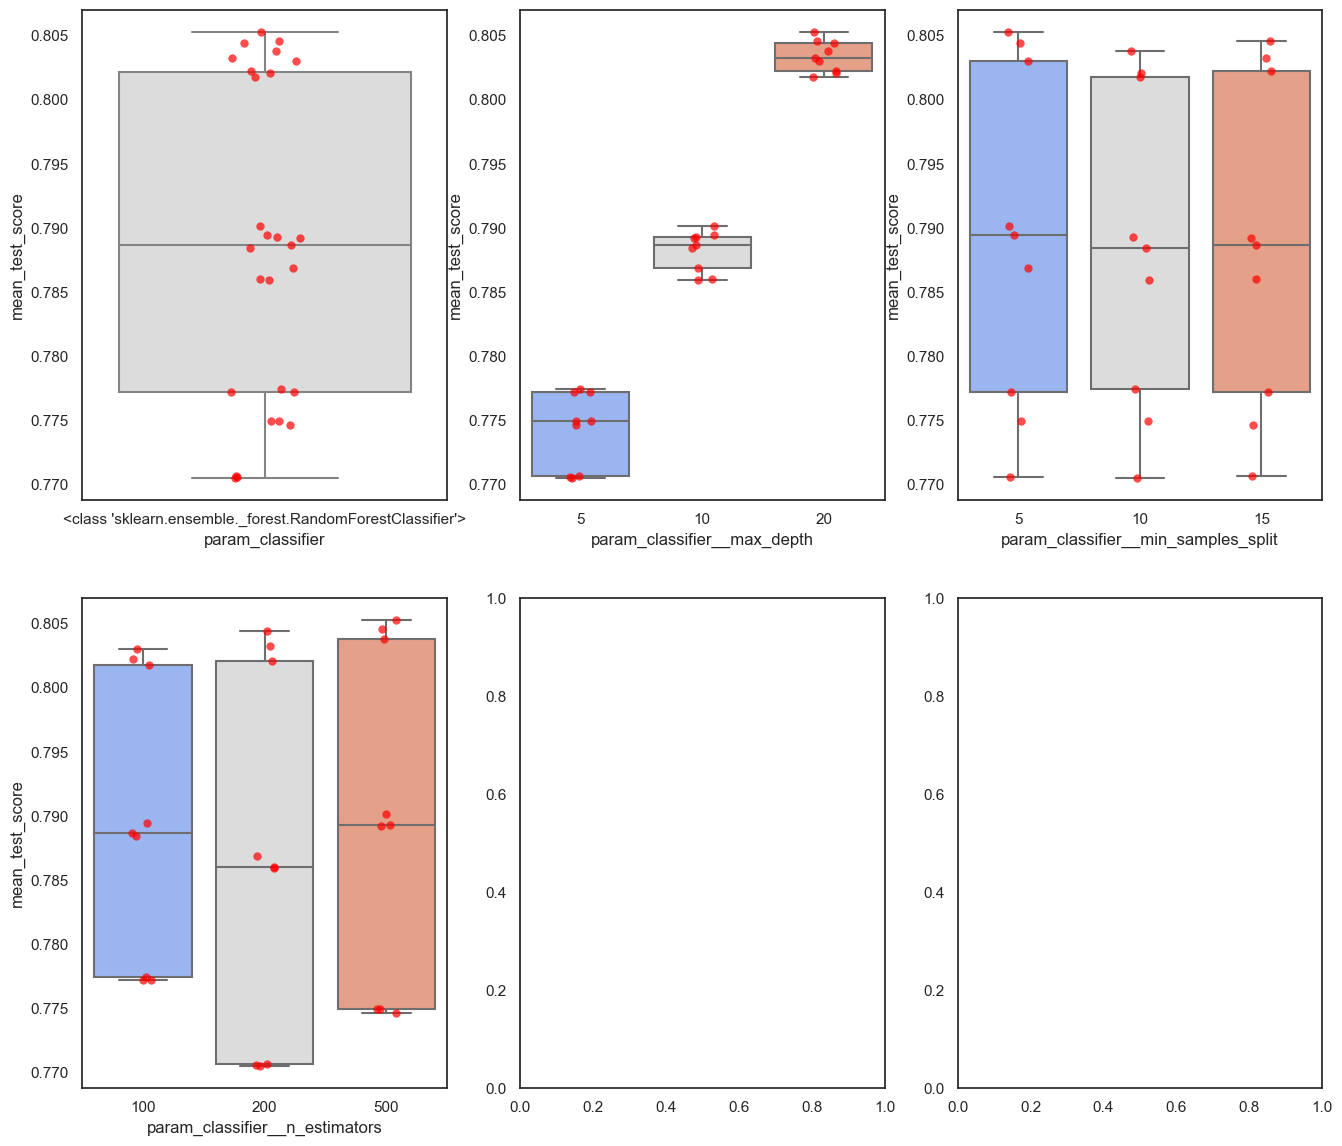

In [55]:
# Plot the impact in accuract for eahc hyperparameter
cols = 3

if int(len(param_list)/cols) != len(param_list)/cols:
    rows = int(len(param_list)/cols) + 1
else:
    rows = int(len(param_list)/cols)

rows = max(2,rows)

figure, axes = plt.subplots(rows, cols, sharex=False, figsize=(16,14))

row = 0
col = 0
for param in param_list:
    sns.boxplot(ax=axes[row,col], data=df3, x=param, y='mean_test_score', palette="coolwarm")
    sns.stripplot(ax=axes[row,col], data=df3, x=param, y='mean_test_score', color='red', size=6, alpha=0.7)

    if col == (cols-1):
        row += 1
        col=0
    else:
        col += 1

#swarmnplot, violinplot, stripplot, barplot, pointplot, boxplot 

In [56]:
#############################################################################################
#############################################################################################
#
#   SNIPPETS of code which could be useful for other things
#
#############################################################################################
#############################################################################################

In [57]:
df2.groupby('param_classifier')['param_classifier'].count()

param_classifier
<class 'sklearn.tree._classes.DecisionTreeClassifier'>        9
<class 'sklearn.ensemble._forest.RandomForestClassifier'>    27
Name: param_classifier, dtype: int64

In [58]:
gs.best_estimator_.steps[1][1].feature_importances_

array([0.00609217, 0.00169941, 0.00404944, 0.00298064, 0.0027721 ,
       0.0005783 , 0.00359353, 0.00050274, 0.00046694, 0.00059915,
       0.00657496, 0.00088184, 0.00068353, 0.00117831, 0.00048531,
       0.0015092 , 0.0004144 , 0.00043645, 0.00659593, 0.00076126,
       0.00523493, 0.00072031, 0.00039158, 0.00048407, 0.00247414,
       0.00044514, 0.00066813, 0.00079995, 0.03382409, 0.0005954 ,
       0.07136073, 0.00052197, 0.00050181, 0.00612686, 0.00055332,
       0.00085266, 0.01686221, 0.0028169 , 0.00098127, 0.00169254,
       0.00062669, 0.00043987, 0.00038038, 0.00090981, 0.02022613,
       0.0005204 , 0.00283492, 0.00540566, 0.00034432, 0.00039374,
       0.00098272, 0.0005686 , 0.00057521, 0.00070389, 0.00041646,
       0.00065015, 0.00034044, 0.00063567, 0.00109648, 0.00087379,
       0.00056995, 0.0005226 , 0.00145512, 0.00137052, 0.00292061,
       0.0004274 , 0.00052401, 0.00058139, 0.00039587, 0.00059396,
       0.00031936, 0.00186454, 0.00036602, 0.00042557, 0.00092

In [59]:
gs.best_estimator_.steps[1][1]

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=500,
                       random_state=42)

In [60]:
gs.cv_results_['mean_test_score']

array([0.69206667, 0.69204444, 0.69204444, 0.72175556, 0.72162222,
       0.72102222, 0.72795556, 0.72786667, 0.72766667, 0.77724444,
       0.77062222, 0.775     , 0.77746667, 0.77055556, 0.77495556,
       0.77726667, 0.77066667, 0.77468889, 0.78946667, 0.78691111,
       0.79015556, 0.78842222, 0.78597778, 0.78933333, 0.78868889,
       0.78604444, 0.78922222, 0.80302222, 0.80442222, 0.80526667,
       0.80175556, 0.80208889, 0.80382222, 0.80222222, 0.80324444,
       0.80462222])

In [61]:
gs.cv_results_['rank_test_score']

array([34, 35, 35, 31, 32, 33, 28, 29, 30, 21, 26, 22, 19, 27, 23, 20, 25,
       24, 11, 16, 10, 15, 18, 12, 14, 17, 13,  6,  3,  1,  9,  8,  4,  7,
        5,  2])

In [62]:
gs.cv_results_['split0_test_score']

array([0.69055556, 0.69055556, 0.69055556, 0.72544444, 0.72577778,
       0.72444444, 0.72866667, 0.729     , 0.72866667, 0.77977778,
       0.77444444, 0.77966667, 0.781     , 0.77411111, 0.77911111,
       0.78077778, 0.77411111, 0.77955556, 0.79333333, 0.79177778,
       0.79411111, 0.79055556, 0.78944444, 0.79166667, 0.79233333,
       0.78955556, 0.79277778, 0.805     , 0.807     , 0.80655556,
       0.80277778, 0.80077778, 0.80466667, 0.80344444, 0.80455556,
       0.80533333])

In [63]:
gs.cv_results_['param_classifier'][1]

DecisionTreeClassifier(random_state=42)

In [64]:
pd.DataFrame(gs.cv_results_)['param_classifier'][23]

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=500,
                       random_state=42)

In [65]:
pd.DataFrame(gs.cv_results_).dtypes

mean_fit_time                          float64
std_fit_time                           float64
mean_score_time                        float64
std_score_time                         float64
param_classifier                        object
param_classifier__max_depth             object
param_classifier__min_samples_split     object
param_classifier__n_estimators          object
params                                  object
split0_test_score                      float64
split1_test_score                      float64
split2_test_score                      float64
split3_test_score                      float64
split4_test_score                      float64
mean_test_score                        float64
std_test_score                         float64
rank_test_score                          int32
split0_train_score                     float64
split1_train_score                     float64
split2_train_score                     float64
split3_train_score                     float64
split4_train_

In [66]:
dir(df['param_classifier'][0])

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'removeprefix',
 'removesuffix',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',


In [67]:
str(getattr(df['param_classifier'][0],'__class__'))

"<class 'str'>"

In [68]:
df['param_classifier'].astype(str)

0     <class 'sklearn.tree._classes.DecisionTreeClas...
1     <class 'sklearn.tree._classes.DecisionTreeClas...
2     <class 'sklearn.tree._classes.DecisionTreeClas...
3     <class 'sklearn.tree._classes.DecisionTreeClas...
4     <class 'sklearn.tree._classes.DecisionTreeClas...
5     <class 'sklearn.tree._classes.DecisionTreeClas...
6     <class 'sklearn.tree._classes.DecisionTreeClas...
7     <class 'sklearn.tree._classes.DecisionTreeClas...
8     <class 'sklearn.tree._classes.DecisionTreeClas...
9     <class 'sklearn.ensemble._forest.RandomForestC...
10    <class 'sklearn.ensemble._forest.RandomForestC...
11    <class 'sklearn.ensemble._forest.RandomForestC...
12    <class 'sklearn.ensemble._forest.RandomForestC...
13    <class 'sklearn.ensemble._forest.RandomForestC...
14    <class 'sklearn.ensemble._forest.RandomForestC...
15    <class 'sklearn.ensemble._forest.RandomForestC...
16    <class 'sklearn.ensemble._forest.RandomForestC...
17    <class 'sklearn.ensemble._forest.RandomFor